In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import nltk
import re
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('nlp/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2351 non-null   int64  
 1   Hotel_name    2351 non-null   object 
 2   Review_Title  2136 non-null   object 
 3   Review_Text   2351 non-null   object 
 4   Rating        2351 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 92.0+ KB


In [18]:
df.head()

,Id,Hotel_name,Review_Title,Review_Text,Rating
0,0,Park Hyatt,Refuge in Chennai,Excellent room and exercise facility. All arou...,80.0
1,1,Hilton Chennai,Hilton Chennai,Very comfortable and felt safe. \r\nStaff were...,100.0
2,2,The Royal Regency,No worth the rating shown in websites. Pricing...,Not worth the rating shown. Service is not goo...,71.0
3,3,Rivera,Good stay,"First of all nice & courteous staff, only one ...",86.0
4,4,Park Hyatt,Needs improvement,Overall ambience of the hotel is very good. In...,86.0


In [108]:
TARGET = 'Rating'
# X = df.drop(TARGET, axis=1)
y = df[TARGET]

In [72]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to C:\Users\Alexander
[nltk_data]     Vovk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Alexander
[nltk_data]     Vovk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alexander Vovk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [70]:
from nltk.tokenize import PunktSentenceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import wordnet, pos_tag, sent_tokenize
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

In [31]:
tokenizer = PunktSentenceTokenizer()
lemmatizer = WordNetLemmatizer()

In [139]:
def to_wordnet_tag(elem):
    if elem[1].startswith('J'):
        return elem[0], wordnet.wordnet.ADJ
    if elem[1].startswith('V'):
        return elem[0], wordnet.wordnet.VERB
    if elem[1].startswith('N'):
        return elem[0], wordnet.wordnet.NOUN
    if elem[1].startswith('R'):
        return elem[0], wordnet.wordnet.ADV
    return elem[0], wordnet.wordnet.NOUN


def transform_text(text):
    """
        Проведём лемматизацию и переведём в lower-case
    """
    text = str(text)
    text = text.lower()
    tokenized = sent_tokenize(text)
    tagged = []

    # POS разметка
    for sent in tokenized:
        pos_tagged = pos_tag(sent.split())
        wordnet_taggs = []

        for elem in pos_tagged:
            wordnet_taggs.append(to_wordnet_tag(elem))

        tagged.append(wordnet_taggs)

    # лемматизация
    result = []
    for sent in tagged:
        lemmatized = []
        for word in sent:
            lemmatized.append(lemmatizer.lemmatize(word[0], pos=word[1]))
        
        result.append(' '.join(lemmatized))

    return ' '.join(result)

In [105]:
df.iloc[0]['Review_Text']

'Excellent room and exercise facility. All around atmosphere was calm and comfortable. Main dining room offers both excellent food and service. Avoid Flying Elephant restaurant, stick to the main dining room.'

In [140]:
transform_text(df.iloc[0]['Review_Text'])

'excellent room and exercise facility. all around atmosphere be calm and comfortable. main dining room offer both excellent food and service. avoid fly elephant restaurant, stick to the main dining room.'

In [141]:
X = pd.DataFrame()

In [142]:
X['Review_Text'] = df['Review_Text'].apply(transform_text)
X.head()

,Review_Text
0,excellent room and exercise facility. all arou...
1,very comfortable and felt safe. staff be very ...
2,not worth the rating shown. service be not goo...
3,"first of all nice & courteous staff, only one ..."
4,overall ambience of the hotel be very good. in...


In [160]:
X['Review_Title'] = df['Review_Title'].apply(transform_text)
X.head()

,Review_Text,Review_Title
0,excellent room and exercise facility. all arou...,refuge in chennai
1,very comfortable and felt safe. staff be very ...,hilton chennai
2,not worth the rating shown. service be not goo...,no worth the rating show in websites. pricing ...
3,"first of all nice & courteous staff, only one ...",good stay
4,overall ambience of the hotel be very good. in...,need improvement


In [161]:
X['Name'] = df['Hotel_name'].apply(transform_text)
X.head()

,Review_Text,Review_Title,Name
0,excellent room and exercise facility. all arou...,refuge in chennai,park hyatt
1,very comfortable and felt safe. staff be very ...,hilton chennai,hilton chennai
2,not worth the rating shown. service be not goo...,no worth the rating show in websites. pricing ...,the royal regency
3,"first of all nice & courteous staff, only one ...",good stay,rivera
4,overall ambience of the hotel be very good. in...,need improvement,park hyatt


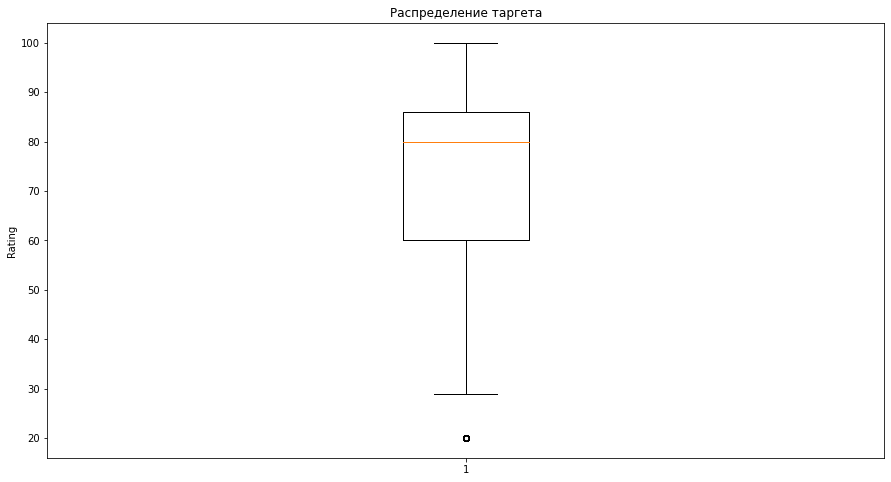

In [196]:
plt.figure(figsize=(15, 8))
plt.boxplot(df['Rating'])
plt.title('Распределение таргета')
plt.ylabel('Rating')
plt.show()

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tf_idf = TfidfVectorizer(analyzer='word')

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [267]:
X_train_counts = tf_idf.fit_transform(X_train['Review_Text'])
X_test_counts = tf_idf.transform(X_test['Review_Text'])

In [268]:
X_train_counts_text = tf_idf.fit_transform(X_train['Review_Text'])
X_test_counts_text = tf_idf.transform(X_test['Review_Text'])

In [269]:
X_train_counts_title = tf_idf.fit_transform(X_train['Review_Title'])
X_test_counts_title = tf_idf.transform(X_test['Review_Title'])

In [270]:
from scipy import sparse

In [271]:
train = sparse.hstack((X_train_counts_text, X_train_counts_title))
train

<1645x4404 sparse matrix of type '<class 'numpy.float64'>'
	with 52833 stored elements in COOrdinate format>

In [272]:
test = sparse.hstack((X_test_counts_text, X_test_counts_title))
test

<706x4404 sparse matrix of type '<class 'numpy.float64'>'
	with 21508 stored elements in COOrdinate format>

In [297]:
svm = SGDRegressor().fit(X_train_counts, y_train)  # обучаемся только на текстах
predictions = svm.predict(X_test_counts)

In [298]:
print(f'MSE: {mean_squared_error(y_test, predictions):.2f}')
print(f'R^2: {r2_score(y_test, predictions):.2f}')

MSE: 404.16
R^2: 0.09


Тут константа была бы не хуже...

In [290]:
from sklearn.linear_model import SGDRegressor
svm = SGDRegressor().fit(train, y_train)  # обучаемся на текстах и заголовках
predictions = svm.predict(test)

In [291]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE: {mean_squared_error(y_test, predictions):.2f}')
print(f'R^2: {r2_score(y_test, predictions):.2f}')

MSE: 338.15
R^2: 0.24


В качестве метрики я буду использовать $R^2$, т.к она понятна с точки зрения результата(MSE я использую по приколу, почему бы и нет, но она не наглядна(338 это много или мало?))

Результат оказался хуже, попробуем немного по feature инжинирить

In [277]:
positive_words = []
negative_words = []

with open('nlp/positive-words.txt') as file:
    for line in file:
        positive_words.append(line.strip())

with open('nlp/negative-words.txt') as file:
    for line in file:
        negative_words.append(line.strip())

positive_words = set(positive_words)
negative_words = set(negative_words)

In [278]:
def get_percent(elem):
    full_len = len(elem['Review_Title']) + len(elem['Review_Text'])
    text = elem['Review_Text'] + elem['Review_Title']
    text = re.sub('[^\sa-z]', '', text)
    pos_counter, neg_counter = 0, 0

    for word in text.split():
        if word in positive_words:
            pos_counter += 1
        if word in negative_words:
            neg_counter += 1

    return [pos_counter / full_len, neg_counter / full_len]

In [279]:
df[df['Rating'] < 40]

,Id,Hotel_name,Review_Title,Review_Text,Rating
13,13,Raj Park Chennai,Worst stay ever.,Booked a Deluxe Room with an occupancy for 2 p...,20.0
30,30,Asiana Place,Not a professionally run place,Let's see:\r\nExpedia booking didn't come thru...,20.0
36,36,BKR Grand,Cleanliness is very poor & below average service,"Room service, Reception Hospitality, Cleanline...",29.0
45,45,Southern Crest,Negative Feedback,The management of this hotel is not upto the e...,20.0
51,51,The Residency Towers,Very bad hospitality much more to improve,The hotel reception staff are very bad. Even t...,29.0
...,...,...,...,...,...
2211,2211,Keys Hotel Katti-Ma,"Worst hotel, don't even thing about it!",Worst hotel! There was no room after the payme...,20.0
2235,2235,E Hotel,Good location but not with the services,The location was good but the there was no ser...,29.0
2276,2276,Emarald,NaN,The rating shows its 3 star.... but its not ev...,20.0
2314,2314,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,20.0


In [280]:
results = list(X.apply(get_percent, axis=1))

# попробую добавить фичи:
# отношение хороших/негативных слов к общему числу
results = np.array(results)
X['Positive_ratio'] = results[:, 0]
X['Negative_ratio'] = results[:, 1]

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [282]:
tf_idf = TfidfVectorizer()
X_train_text_vec = tf_idf.fit_transform(X_train['Review_Text'])
X_test_text_vec = tf_idf.transform(X_test['Review_Text'])

X_train_title_vec = tf_idf.fit_transform(X_train['Review_Title'])
X_test_title_vec = tf_idf.transform(X_test['Review_Title'])

X_train_name_vec = tf_idf.fit_transform(X_train['Name'])
X_test_name_vec = tf_idf.transform(X_test['Name'])

In [283]:
X_train_vec_matrix = sparse.hstack((X_train_text_vec, X_train_title_vec, X_train_name_vec))
X_test_vec_matrix = sparse.hstack((X_test_text_vec, X_test_title_vec, X_test_name_vec))

In [286]:
X_train_vec = pd.concat([X_train[['Positive_ratio', 'Negative_ratio']].reset_index(drop=True), 
    pd.DataFrame(X_train_vec_matrix.toarray())], axis=1)
X_test_vec = pd.concat([X_test[['Positive_ratio', 'Negative_ratio']].reset_index(drop=True), 
    pd.DataFrame(X_test_vec_matrix.toarray())], axis=1)

In [299]:
svm = SGDRegressor().fit(X_train_vec, y_train)

predictions = svm.predict(X_test_vec)

In [300]:
print(f'MSE: {mean_squared_error(y_test, predictions):.2f}')
print(f'R^2: {r2_score(y_test, predictions):.2f}')

MSE: 206.63
R^2: 0.54


Эти 2 фичи заметно улучшили результат нашей модели.

Попробуем другие модели

In [301]:
!pip install catboost

^C


In [302]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [307]:
lin_reg = LinearRegression().fit(X_train_vec, y_train)
forest = RandomForestRegressor().fit(X_train_vec, y_train)
catboost = CatBoostRegressor(silent=True).fit(X_train_vec, y_train)

In [308]:
lin_reg_pred = lin_reg.predict(X_test_vec)
forest_pred = forest.predict(X_test_vec)
catboost_pred = catboost.predict(X_test_vec)

In [309]:
print(f'R^2 Linear Regression: {r2_score(y_test, lin_reg_pred):.2f}')
print(f'R^2 Forest: {r2_score(y_test, forest_pred):.2f}')
print(f'R^2 Catboost: {r2_score(y_test, catboost_pred):.2f}')

R^2 Linear Regression: 0.27
R^2 Forest: 0.53
R^2 Catboost: 0.57


Catboost позволил немного улучшить результат, попробую ещё подобрать гиперпараметры

In [312]:
params = {
    'depth': [5, 7, 9, 12], 'learning_rate': [0.02, 0.05, 0.08], 'iterations': [400, 600, 1000]
}

In [314]:
catboost = CatBoostRegressor().grid_search(params, X_train_vec, y_train)
catboost

0:	learn: 74.4553634	test: 74.2304487	best: 74.2304487 (0)	total: 44.1ms	remaining: 17.6s
1:	learn: 73.1094007	test: 72.8895727	best: 72.8895727 (1)	total: 79.1ms	remaining: 15.7s
2:	learn: 71.7749751	test: 71.5681441	best: 71.5681441 (2)	total: 121ms	remaining: 16s
3:	learn: 70.4888263	test: 70.2882744	best: 70.2882744 (3)	total: 165ms	remaining: 16.3s
4:	learn: 69.2232260	test: 69.0253700	best: 69.0253700 (4)	total: 219ms	remaining: 17.3s
5:	learn: 67.9815176	test: 67.7800675	best: 67.7800675 (5)	total: 266ms	remaining: 17.5s
6:	learn: 66.7717593	test: 66.5752316	best: 66.5752316 (6)	total: 327ms	remaining: 18.3s
7:	learn: 65.5888502	test: 65.4061392	best: 65.4061392 (7)	total: 375ms	remaining: 18.4s
8:	learn: 64.4225566	test: 64.2420079	best: 64.2420079 (8)	total: 412ms	remaining: 17.9s
9:	learn: 63.2835875	test: 63.1029492	best: 63.1029492 (9)	total: 456ms	remaining: 17.8s
10:	learn: 62.1606470	test: 61.9801208	best: 61.9801208 (10)	total: 475ms	remaining: 16.8s
11:	learn: 61.05550

KeyboardInterrupt: 